<a href="https://colab.research.google.com/github/palarunava/machine-learning-courses/blob/main/tensorflow-developer-professional-certificate/fashion-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

Number of training samples: (60000, 28, 28)
Number of test samples: 10000
LABEL: 9

IMAGE PIXEL ARRAY:

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 1

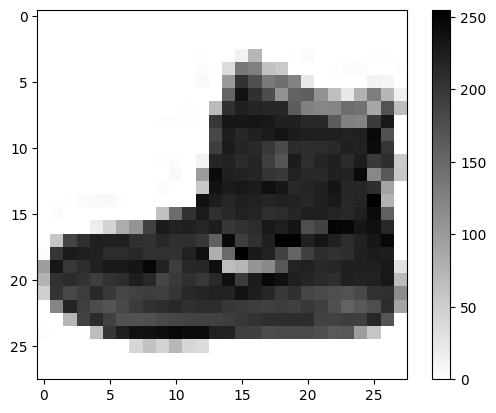

In [55]:
fmnist = tf.keras.datasets.fashion_mnist

# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
print(f'Number of training samples: {training_images.shape}')
print(f'Number of test samples: {test_images.shape[0]}')

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n\n{training_images[index]}\n\n')

# Visualize the image using the default colormap (viridis)
# Arg
#   cmp: colormap = 'viridis' by default
plt.imshow(training_images[index], cmap='binary')
plt.colorbar()
plt.show()

# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

**Softmax function**

In [56]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.6328 - sparse_categorical_accuracy: 0.7808
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3777 - sparse_categorical_accuracy: 0.8662
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3347 - sparse_categorical_accuracy: 0.8802
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3090 - sparse_categorical_accuracy: 0.8869
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2958 - sparse_categorical_accuracy: 0.8912
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3496 - sparse_categorical_accuracy: 0.8782
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

The probability for each class: [2.8298023e-06 1.7523516e-10 1.5526302e-07 1.9525763e-09 1.0002212e-06 2.0193165e-02 1.0600032e-05 4.1465942e-02 9.7604902e-07 9.3832529e-01]


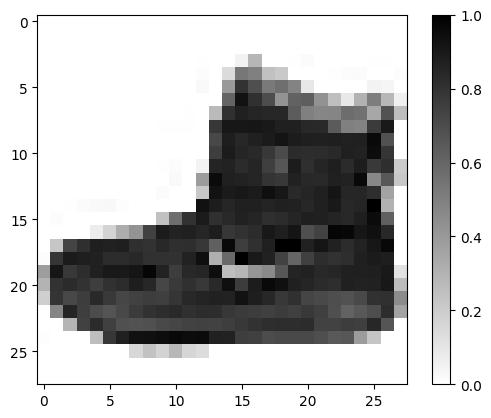


The predicted class is 9 and the actual class is 9


In [57]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# model.compile(optimizer = tf.optimizers.Adam(),
#               loss = 'sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

model.fit(training_images, training_labels, epochs=5)

# Returns:
#   Scalar test loss (if the model has a single output and no metrics) or list of scalars (if the model has multiple outputs and/or metrics).
#   The attribute model.metrics_names will give you the display labels for the scalar outputs.

# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

plt.imshow(training_images[index], cmap='binary')
plt.colorbar()
plt.show()
print(f'\nThe probability for each class: {classifications[0]}')
print(f'\nThe predicted class is {np.argmax(classifications[0])} and the actual class is {test_labels[0]}')